# Single line animation

The objective is to animate the position of a single vehicle. 

In [7]:
%matplotlib inline

In [3]:
dt = 1/30
dt

0.03333333333333333

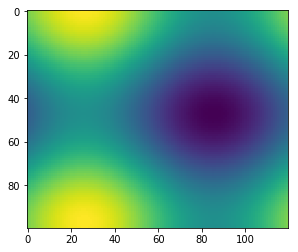

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0,1,1/30)
y = x+1

def updatefig(frame):
    global x,y
    i = x.loc[frame]
    x_data = x[0:i]
    y_data = y[0:i]
    



ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.show()



def f(x, y):
    return np.sin(x) + np.cos(y)


x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)

im = plt.imshow(f(x, y), animated=True)


def updatefig(*args):
    global x, y
    x += np.pi / 15.
    y += np.pi / 20.
    im.set_array(f(x, y))
    return im,


ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
plt.show()

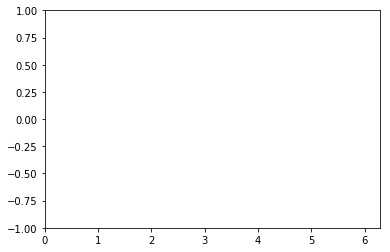

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
xdata, ydata = [], []
ln, = plt.plot([], [], 'ro', animated=True)

def init():
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return ln,

def update(frame):
    xdata.append(frame)
    ydata.append(np.sin(frame))
    ln.set_data(xdata, ydata)
    return ln,

ani = FuncAnimation(fig, update, frames=np.linspace(0, 2*np.pi, 128),
                    init_func=init, blit=True)
plt.show()

In [9]:
np.linspace(0, 2*np.pi, 128)


array([ 0.        ,  0.0494739 ,  0.0989478 ,  0.1484217 ,  0.1978956 ,
        0.2473695 ,  0.2968434 ,  0.3463173 ,  0.3957912 ,  0.4452651 ,
        0.494739  ,  0.5442129 ,  0.5936868 ,  0.6431607 ,  0.6926346 ,
        0.7421085 ,  0.7915824 ,  0.8410563 ,  0.8905302 ,  0.9400041 ,
        0.989478  ,  1.0389519 ,  1.0884258 ,  1.1378997 ,  1.1873736 ,
        1.2368475 ,  1.2863214 ,  1.3357953 ,  1.3852692 ,  1.4347431 ,
        1.484217  ,  1.5336909 ,  1.5831648 ,  1.6326387 ,  1.6821126 ,
        1.7315865 ,  1.7810604 ,  1.8305343 ,  1.8800082 ,  1.9294821 ,
        1.978956  ,  2.0284299 ,  2.0779038 ,  2.1273777 ,  2.1768516 ,
        2.2263255 ,  2.2757994 ,  2.3252733 ,  2.3747472 ,  2.4242211 ,
        2.473695  ,  2.5231689 ,  2.5726428 ,  2.6221167 ,  2.6715906 ,
        2.7210645 ,  2.7705384 ,  2.8200123 ,  2.8694862 ,  2.9189601 ,
        2.968434  ,  3.0179079 ,  3.0673818 ,  3.1168557 ,  3.1663296 ,
        3.2158035 ,  3.2652774 ,  3.3147513 ,  3.3642252 ,  3.41

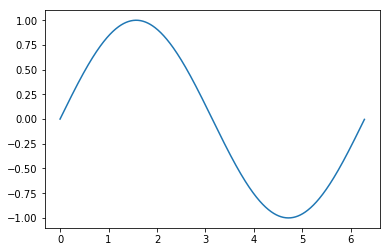

In [12]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from IPython.display import HTML

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i/20.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.sin(x))
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
# blit=True dose not work on Mac, set blit=False
# interval= update frequency
ani = animation.FuncAnimation(fig=fig, func=animate, frames=100, init_func=init,
                              interval=20, blit=False)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html
# anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
HTML(ani.to_html5_video())

#plt.show()


((0, 1), [])

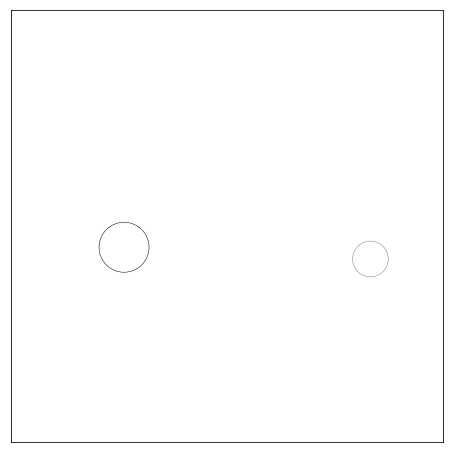

In [20]:
# New figure with white background
fig = plt.figure(figsize=(6,6), facecolor='white')

# New axis over the whole figure, no frame and a 1:1 aspect ratio
ax = fig.add_axes([0,0,1,1], frameon=True, aspect=1)

# Number of ring
n = 3
size_min = 50
size_max = 50*50

# Ring position
P = np.random.uniform(0,1,(n,2))

# Ring colors
C = np.ones((n,4)) * (0,0,0,1)
# Alpha color channel goes from 0 (transparent) to 1 (opaque)
C[:,3] = np.linspace(0,1,n)

# Ring sizes
S = np.linspace(size_min, size_max, n)

# Scatter plot
scat = ax.scatter(P[:,0], P[:,1], s=S, lw = 0.5,
                  edgecolors = C, facecolors='None')

# Ensure limits are [0,1] and remove ticks
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])

In [26]:
def update(frame):
    global P, C, S

    # Every ring is made more transparent
    C[:,3] = np.maximum(0, C[:,3] - 1.0/n)

    # Each ring is made larger
    S += (size_max - size_min) / n

    # Reset ring specific ring (relative to frame number)
    i = frame % 2
    P[i] = np.random.uniform(0,1,2)
    S[i] = size_min
    C[i,3] = 1

    # Update scatter object
    scat.set_edgecolors(C)
    scat.set_sizes(S)
    scat.set_offsets(P)

    # Return the modified object
    return scat,


In [27]:
ani = animation.FuncAnimation(fig, update, interval=10, blit=True, frames=200)
HTML(ani.to_html5_video())